# Mapas politico de Republica Dominicana
por Luis Despradel

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
directorio = 'ShapeFilesCenso2010'

## Provincia

In [28]:
#Importar Shapefile de Provincia
map = gpd.read_file(directorio + "/PROVCenso2010.shp")

#Importar data a graficar
data = pd.read_excel('PoblacionProvincias.xlsx')

#Uniendo shapefile y data
map_and_data= map.merge(data, on="TOPONIMIA")


(162755.08751499956, 590890.005385, 1919926.74949, 2218801.46431)

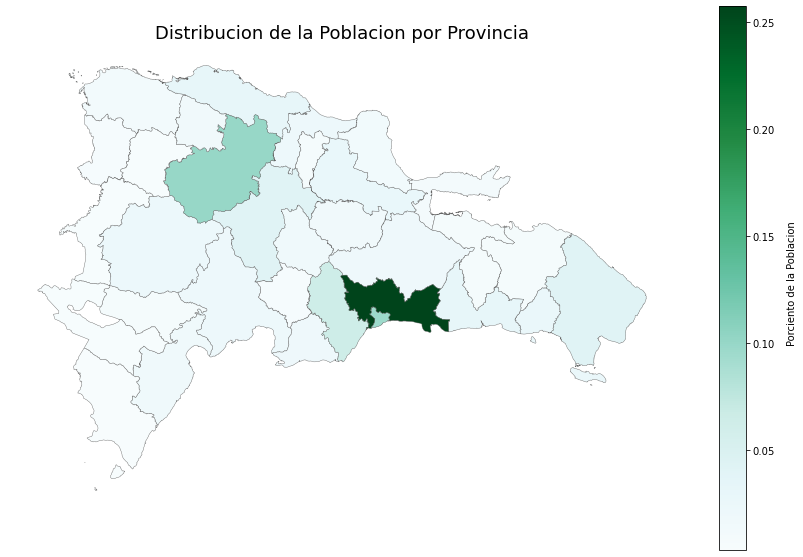

In [46]:
#Graficar Mapa

fig, ax = plt.subplots(1, figsize=(15, 10))
plt.xticks(rotation=90)

map_and_data.plot(column="Porciento_Poblacion", cmap="BuGn", linewidth=0.4, ax=ax, edgecolor=".4")
plt.axis('off')
plt.title('Distribucion de la Poblacion por Provincia', fontdict={'fontsize': '18', 'fontweight' : '3'})


#Crear leyenda
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(
                                            vmin=map_and_data['Porciento_Poblacion'].min()
                                            ,vmax=map_and_data['Porciento_Poblacion'].max())
                                            )
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.text(2.5, 0.10, 'Porciento de la Poblacion', rotation=90)

ax.set_facecolor('w')
plt.axis('off')



In [7]:
# Para salvar como vector
plt.savefig("MapaProvincia_DN.svg")

<Figure size 432x288 with 0 Axes>

## Municipio

In [27]:
#Importar Shapefile de Municipios
map_mun = gpd.read_file(directorio + "/MUNCenso2010.shp")

#Eligiendo solo el Gran Santo Domingo
sd = map_mun[map_mun['REG'] == '10'] 

Text(0.5, 1.0, 'CervezaSOT por Municipio')

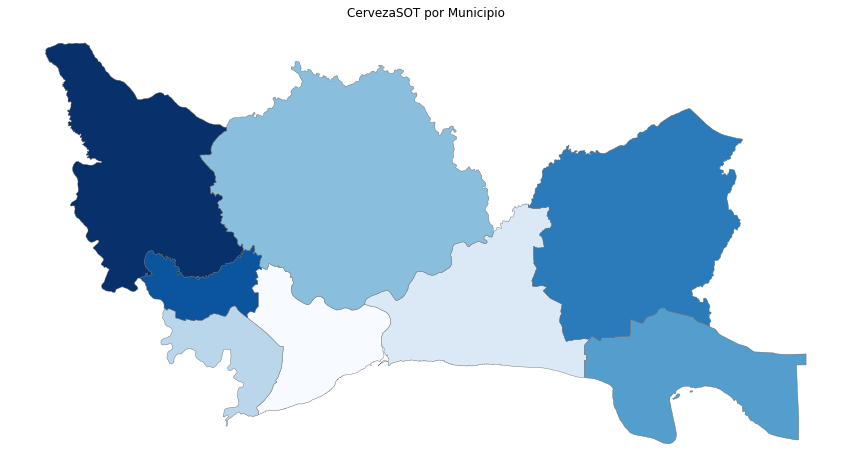

In [28]:
#Graficar Mapa

fig, ax = plt.subplots(1, figsize=(15, 10))
plt.xticks(rotation=90)

sd.plot(cmap="Blues", linewidth=0.4, ax=ax, edgecolor=".4")

ax.set_facecolor('w')
plt.axis('off')


plt.title('Gran Santo Domingo')

## Barrio

In [29]:
#Importar Shapefile de Barrios
map_bp = gpd.read_file("ShapeFilesCenso2010/BPCenso2010.shp")

#Elegiendo solo Distrito Nacional
dn = map_bp[map_bp['PROV'] == '01'] 

#Importar data a graficar
data = pd.read_excel('ListadoBarrios_DN.xlsx')

#Uniendo shapefile y data
map_and_data_bp= dn.merge(data, on="TOPONIMIA")

Text(0.5, 1.0, 'Barrios del Distrito Nacional')

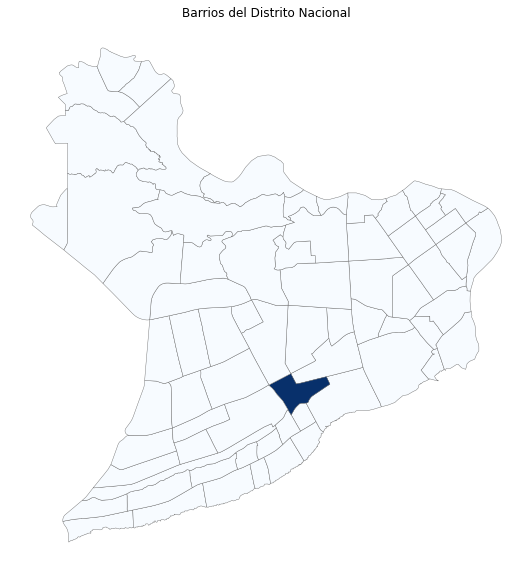

In [30]:
#Plotting Graph

fig, ax = plt.subplots(1, figsize=(15, 10))
plt.xticks(rotation=90)

map_and_data_bp.plot(column="Color", cmap="Blues", linewidth=0.4, ax=ax, edgecolor=".4")
plt.axis('off')
plt.savefig("MapaDN_Barrios.svg")

plt.title('Barrios del Distrito Nacional')